c:\Users\wolle\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.7482 - loss: 0.7485 - val_accuracy: 0.8227 - val_loss: 0.4981
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.8459 - loss: 0.4365 - val_accuracy: 0.8447 - val_loss: 0.4412
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.8559 - loss: 0.4009 - val_accuracy: 0.8556 - val_loss: 0.4001
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.8674 - loss: 0.3674 - val_accuracy: 0.8459 - val_loss: 0.4248
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8745 - loss: 0.3479 - val_accuracy: 0.8656 - val_loss: 0.3741
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.8800 - loss: 0.3288 - val_accuracy: 0.8660 - val_loss: 0.3699
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.8832 - loss: 0.3176 - val_accuracy: 0.8738 - val_loss: 0.3577
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.8878 -

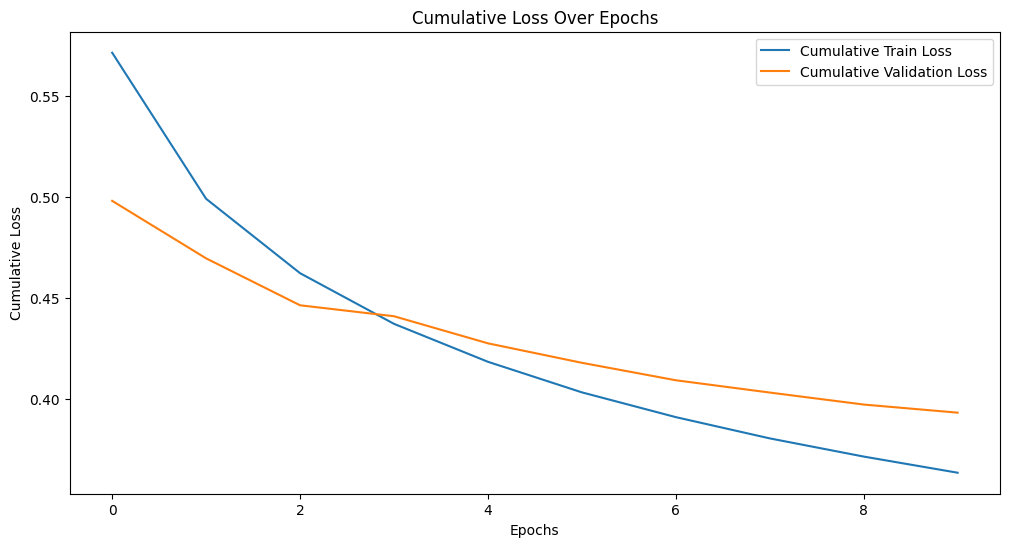

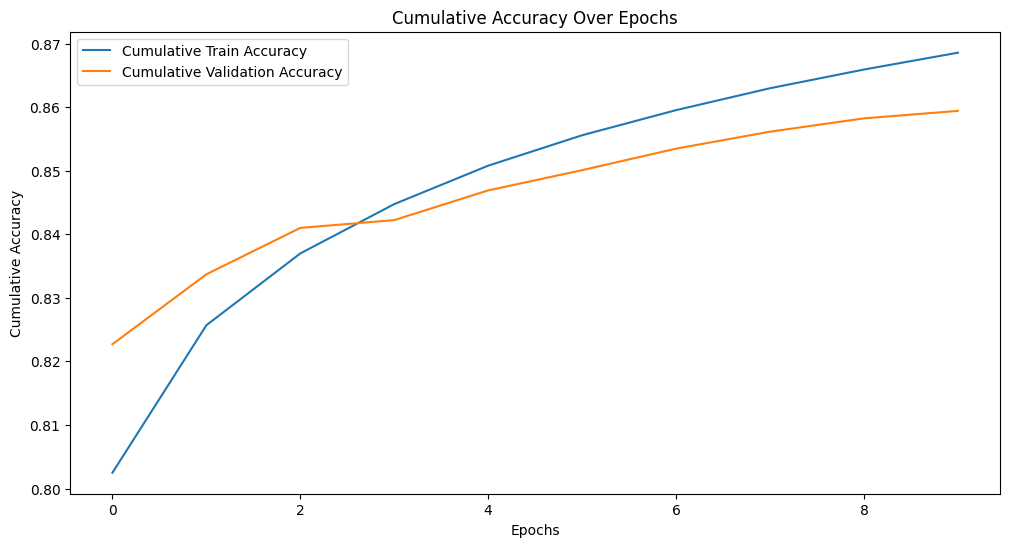

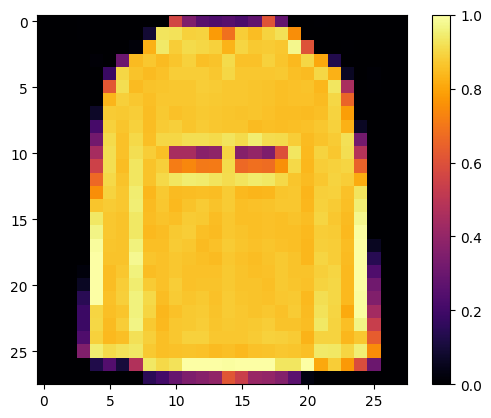

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model
def flatten():
    global model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

def avg_pool_1D():
    global model
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='valid'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

def avg_pool_2D():
    global model
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='valid'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


flatten()
avg_pool_1D
avg_pool_2D()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

# Extract the loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Calculate cumulative loss and accuracy
cumulative_train_loss = np.cumsum(train_loss) / np.arange(1, len(train_loss) + 1)
cumulative_train_accuracy = np.cumsum(train_accuracy) / np.arange(1, len(train_accuracy) + 1)
cumulative_val_loss = np.cumsum(val_loss) / np.arange(1, len(val_loss) + 1)
cumulative_val_accuracy = np.cumsum(val_accuracy) / np.arange(1, len(val_accuracy) + 1)

# Plot cumulative loss
plt.figure(figsize=(12, 6))
plt.plot(cumulative_train_loss, label='Cumulative Train Loss')
plt.plot(cumulative_val_loss, label='Cumulative Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cumulative Loss')
plt.legend()
plt.title('Cumulative Loss Over Epochs')
plt.show()

# Plot cumulative accuracy
plt.figure(figsize=(12, 6))
plt.plot(cumulative_train_accuracy, label='Cumulative Train Accuracy')
plt.plot(cumulative_val_accuracy, label='Cumulative Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Cumulative Accuracy')
plt.legend()
plt.title('Cumulative Accuracy Over Epochs')
plt.show()

# Display a sample image
plt.imshow(test_images[98], cmap='inferno')
plt.colorbar()
plt.grid(False)
plt.show()